In [232]:
library(dplyr)

In [233]:
library(ggplot2)

In [234]:
data<-as.data.frame(read.csv("June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv",stringsAsFactors=TRUE))

In [235]:
names(data)

[1] "ï..psraid"  "sample"     "int_date"   "lang"       "usr"       
  [6] "cregion"    "state"      "form"       "sex"        "q1"        
 [11] "q3"         "eminuse"    "intmob"     "intfreq"    "home4nw"   
 [16] "bbhome1"    "bbhome2"    "bbhome3a"   "bbhome3b"   "bbhome3c"  
 [21] "bbhome3d"   "bbhome3e"   "device1a"   "smart1"     "q4"        
 [26] "bbsmart1"   "bbsmart2"   "bbsmart3a"  "bbsmart3b"  "bbsmart3c" 
 [31] "bbsmart3d"  "bbsmart3e"  "bbsmart3f"  "bbsmart4"   "cable1"    
 [36] "cable2"     "cable3a"    "cable3b"    "cable3c"    "act19"     
 [41] "act87a"     "act87b"     "act137"     "q5a"        "q5b"       
 [46] "q5c"        "q5d"        "q5e"        "q5f"        "date1a"    
 [51] "date2a"     "date3a"     "date3b"     "date4a"     "date4b"    
 [56] "date4c"     "date4d"     "date4e"     "date4f"     "game1"     
 [61] "game2a"     "game2b"     "game2c"     "game2d"     "game2e"    
 [66] "game2f"     "game3a"     "game3b"     "game4"      "emplnw"    
 [71] "emptype1"   "emptype2"   "emptype3"   "stud"       "job1a"     
 [76] "job1b"      "job1c"      "job1d"      "job1e"      "job1f"     
 [81] "job2"       "job3a"      "job3b"      "job3c"      "job3d"     
 [86] "job3e"      "job3f"      "job3g"      "job3h"      "job4"      
 [91] "smjob1"     "smjob2a"    "smjob2b"    "smjob2c"    "smjob2d"   
 [96] "smjob2e"    "smjob3"     "smjob4a"    "smjob4b"    "smjob4c"   
[101] "smjob4d"    "smjob4e"    "snsjob1a"   "snsjob1b"   "snsjob1c"  
[106] "snsjob2a"   "snsjob2b"   "job5a"      "job5b"      "job5c"     
[111] "job5d"      "auto1a"     "auto1b"     "auto1c"     "auto1d"    
[116] "auto1e"     "auto2"      "auto3"      "age"        "marital"   
[121] "hh1"        "par"        "kidage1"    "kidage2"    "kidage3"   
[126] "educ2"      "edinst"     "disa"       "party"      "partyln"   
[131] "ideo"       "hisp"       "birth_hisp" "race"       "inc"       
[136] "ql1a"       "qc1"        "zipcode"    "weight"     "standwt"

In [236]:
data<-select (data,age,sex,inc,emptype2,race)

#handling missing values
data$emptype2[is.na(data$emptype2)]<-3

#filtering improper data
data<-filter(data,age<98,emptype2<3,inc<10,sex<3,race<7)

names(data) <- c("Age","LaborType","Income","Sex","Race")

#kmodes(data, 3, iter.max = 10, weighted = FALSE)


#Normalizing income and education(Income and Education are ordinal data)
normalized_data = function(x){(x-min(x))/(max(x)-min(x))}#data <- normalized_data(data)
data <- normalized_data(data)

#data

In [237]:
fit<-kmeans(data,3) 

In [238]:
fit

K-means clustering with 3 clusters of sizes 378, 264, 315

Cluster means:
        Age   LaborType     Income         Sex        Race
1 0.3023304 0.004369538 0.04428988 0.005826051 0.007044765
2 0.6667518 0.005149813 0.05720123 0.007405516 0.003575077
3 0.5107901 0.005207776 0.05849831 0.006777243 0.006384876

Clustering vector:
  [1] 3 2 3 3 2 1 2 2 1 1 3 2 1 2 3 2 3 1 2 2 3 3 2 2 2 3 1 2 2 3 2 1 2 2 2 2 3
 [38] 1 1 3 2 2 3 3 2 1 3 3 2 1 3 3 3 3 2 2 2 2 2 2 2 1 3 3 2 3 2 2 2 2 1 3 3 3
 [75] 2 2 2 3 3 1 3 2 2 3 1 1 1 2 1 2 1 2 3 2 2 2 1 3 3 2 3 1 3 2 3 3 2 3 3 1 1
[112] 2 3 3 3 1 2 2 1 3 2 2 2 3 1 1 2 2 1 1 3 3 2 3 2 3 1 1 2 3 2 3 1 2 2 3 2 2
[149] 3 2 2 2 3 3 3 2 2 3 2 3 3 1 3 3 2 3 2 3 1 2 2 2 2 2 3 1 3 2 2 3 3 3 3 2 2
[186] 2 2 1 3 2 3 2 3 1 3 2 2 1 3 3 2 3 2 3 3 2 3 2 2 3 2 2 1 1 2 3 2 2 3 3 2 1
[223] 3 3 1 2 2 2 1 1 1 2 2 2 2 2 3 1 2 3 1 3 1 3 3 1 3 2 1 3 3 2 3 3 1 1 1 3 2
[260] 3 3 3 2 3 1 1 1 2 2 3 2 3 2 1 1 1 1 3 1 1 1 1 1 1 3 1 3 1 2 2 1 1 1 1 1 2
[297] 2 3 3 3 1 1 1 3 1 1 1 2 

It can be perceived from the obtained data that the three clusters represent three distinct groups with distinct characteristics:

Cluster1 contains Young people whose characteristics are doing more labor work, have least income, lower level of education and are from mixed race

Cluster2 contains old people whose characteristics are doing least labor work, high income level and mostly African American 

Cluster3 contains Middled aged people whose characteristics are highest income levels, mostly no manual labour and who are from mixed race

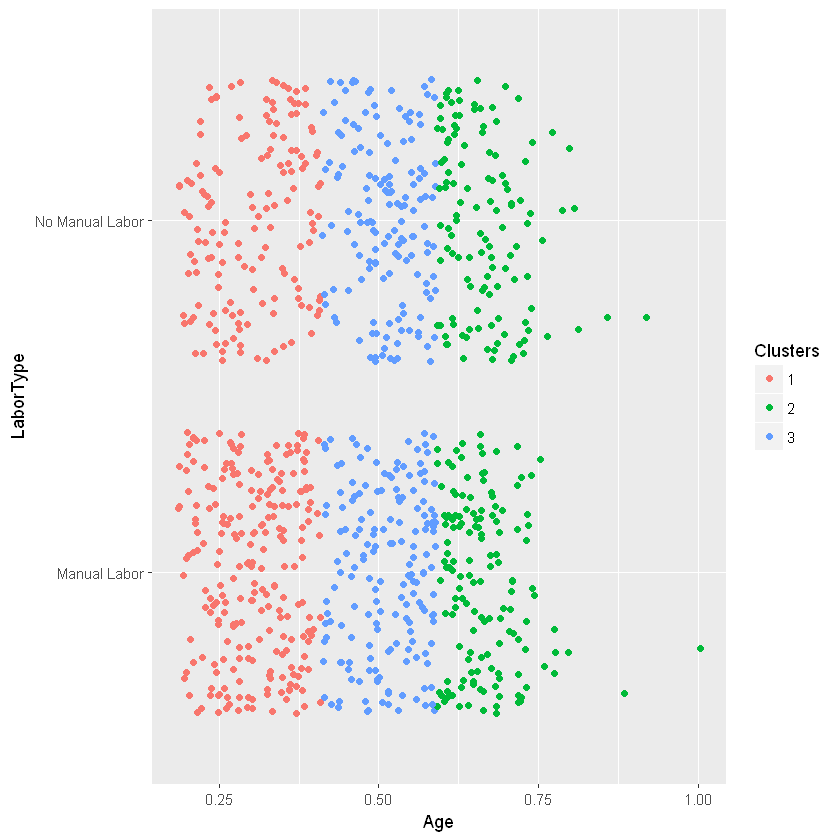

In [239]:
Clusters <- as.factor(fit$cluster)
data1 <- data
data1 <- within(data1, LaborType <- factor(LaborType, labels = c("Manual Labor","No Manual Labor")))
ggplot(data1, aes(Age, LaborType,color = Clusters)) + geom_jitter()

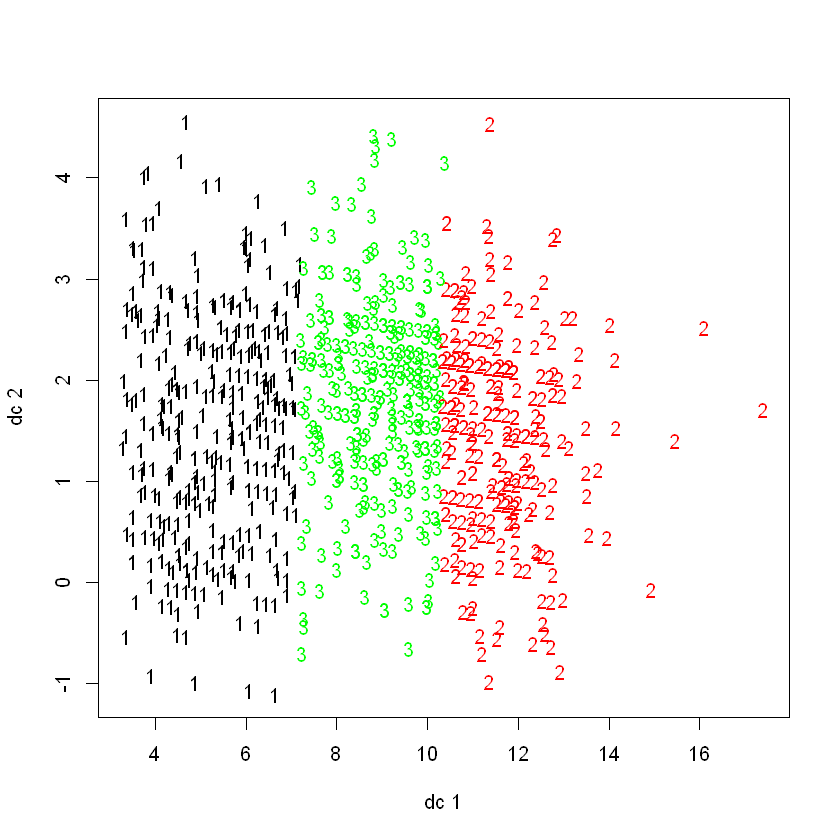

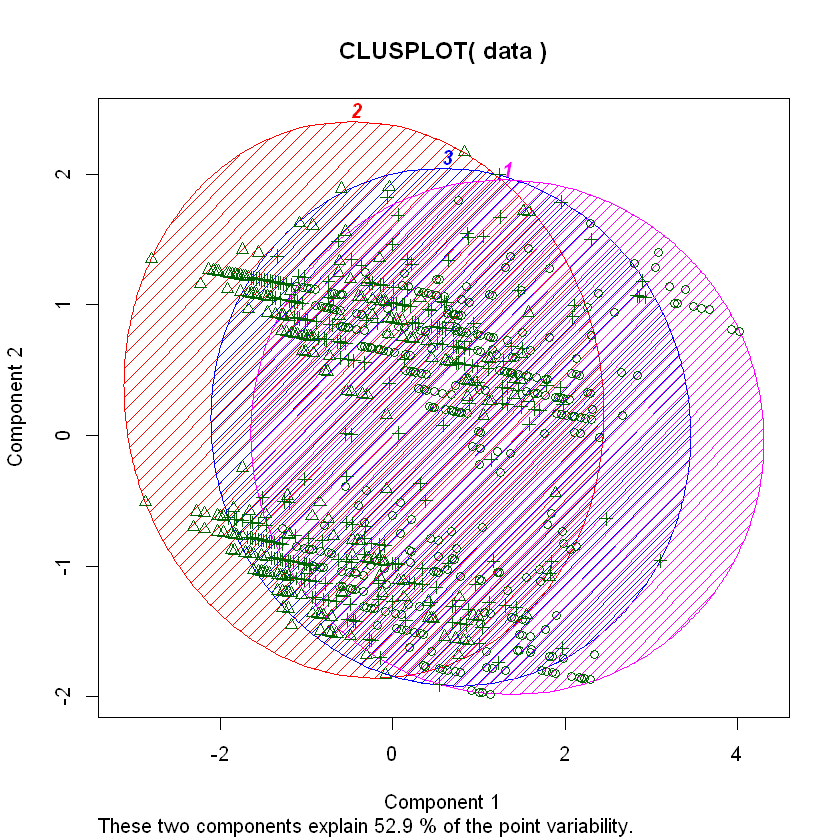

In [240]:
library(cluster)
#install.packages("fpc",repos = 'https://cran.r-project.org/')
library(fpc)

plotcluster(data,fit$cluster)
clusplot(data,fit$cluster,color=TRUE, shade=TRUE,lines=0,labels=4)

In [241]:
fit<-kmeans(data,5) 
fit

K-means clustering with 5 clusters of sizes 210, 178, 184, 231, 154

Cluster means:
        Age   LaborType     Income         Sex        Race
1 0.3596041 0.004280364 0.04975923 0.006313537 0.006634564
2 0.4834617 0.005617978 0.05914657 0.007196061 0.007259184
3 0.2468246 0.004396678 0.03755496 0.005251588 0.007938447
4 0.5891337 0.005009971 0.05870908 0.006566467 0.004523566
5 0.7021013 0.005107252 0.05727419 0.007806800 0.002772508

Clustering vector:
  [1] 2 5 4 2 4 1 4 5 3 3 2 5 3 5 4 5 2 1 5 5 2 4 5 4 4 4 1 4 5 4 5 1 5 4 5 5 2
 [38] 1 3 4 5 5 2 2 5 1 4 4 5 3 4 4 4 2 4 5 4 5 4 5 4 3 4 2 5 4 5 5 4 5 1 4 4 4
 [75] 5 5 5 4 4 3 4 4 5 2 3 1 1 5 3 5 3 5 4 5 5 5 3 4 4 5 4 1 4 4 4 2 4 4 4 3 1
[112] 5 4 2 2 3 5 5 1 2 5 5 5 2 1 3 5 5 1 1 2 2 4 1 4 2 1 3 4 4 5 4 1 4 4 4 5 4
[149] 2 4 4 5 2 2 2 5 5 2 5 4 4 1 2 2 4 4 5 4 1 4 5 4 4 5 4 3 2 5 5 4 1 4 2 5 4
[186] 4 5 1 2 5 2 5 4 1 2 4 4 1 2 2 5 2 4 2 2 5 2 4 4 2 5 4 1 3 5 4 5 5 4 4 5 1
[223] 2 2 1 5 4 4 1 1 1 5 5 5 4 5 4 3 4 1 1 4 1 2 4 3 4 5 1 2 

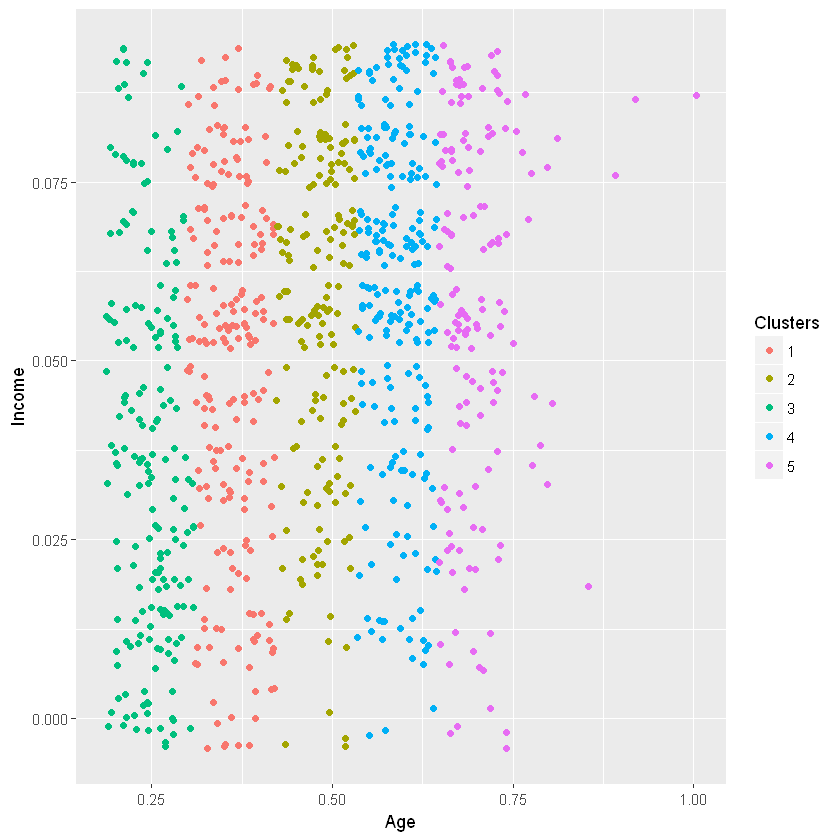

In [242]:
Clusters <- as.factor(fit$cluster)
data1 <- data
#data1 <- within(data1, LaborType <- factor(LaborType, labels = c("Manual Labor","No Manual Labor")))
ggplot(data1, aes(Age, Income,color = Clusters)) + geom_jitter()

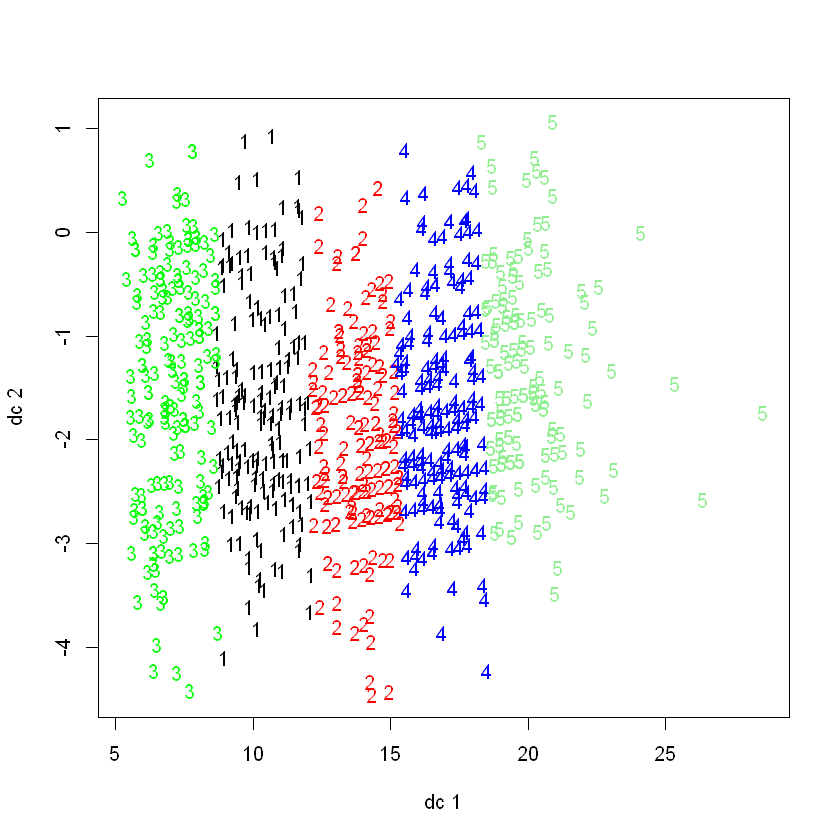

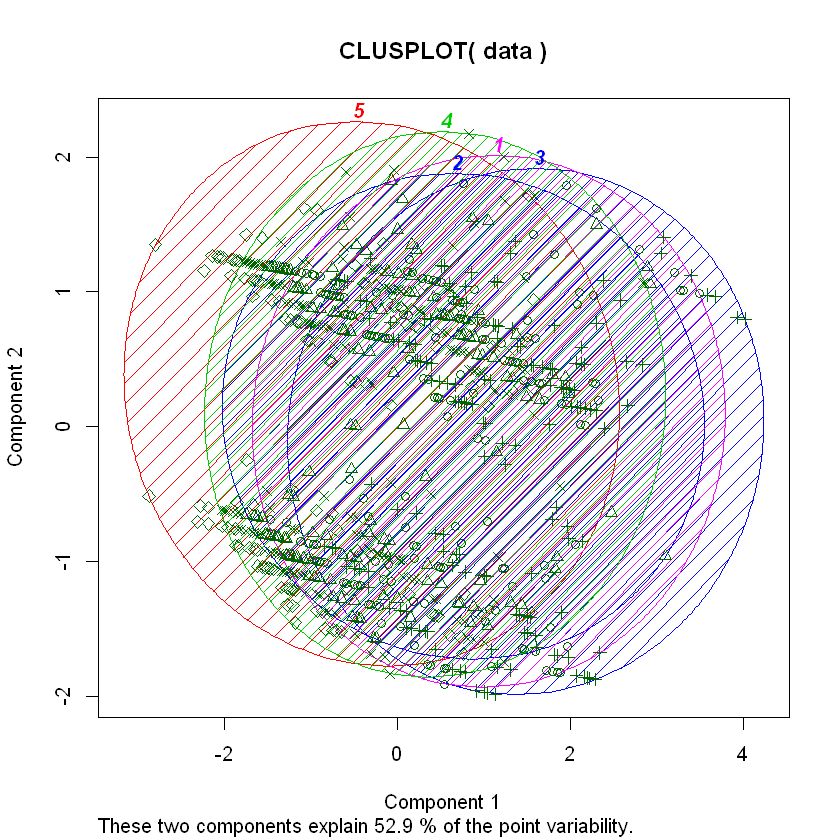

In [243]:
library(cluster)
#install.packages("fpc",repos = 'https://cran.r-project.org/')
library(fpc)

plotcluster(data,fit$cluster)
clusplot(data,fit$cluster,color=TRUE, shade=TRUE,lines=0,labels=4)

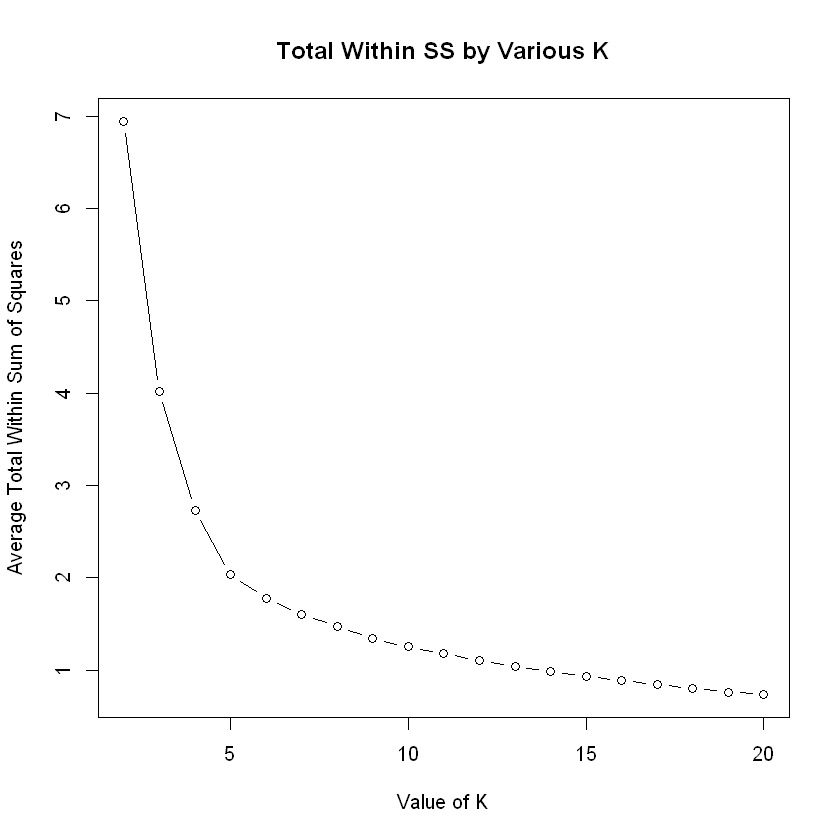

In [244]:
rng<-2:20 #K from 2 to 20
tries <-100 #Run the K Means algorithm 100 times
avg.totw.ss <-integer(length(rng)) #Set up an empty vector to hold all of points
for(v in rng){ # For each value of the range variable
 v.totw.ss <-integer(tries) #Set up an empty vector to hold the 100 tries
 for(i in 1:tries){
 k.temp <-kmeans(data,centers=v) #Run kmeans
 v.totw.ss[i] <-k.temp$tot.withinss#Store the total withinss
 }
 avg.totw.ss[v-1] <-mean(v.totw.ss) #Average the 100 total withinss
}
plot(rng,avg.totw.ss,type="b", main="Total Within SS by Various K",
 ylab="Average Total Within Sum of Squares",
 xlab="Value of K")